---
layout: default
categories: linearRegression
title: "Linear Regression - Cost Function"
permalink: /ML3/
order: 3
comments: true
---

In [14]:
%pylab --no-import-all inline
import pandas as pd
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Loss and Cost Functions
In order to train an algorithm we need a way to understand how far its output $\hat{y}_i$ is from labeled examples $y_i$. This distance is calculated through the **Loss function** $\mathcal{L}$. A loss function takes as input $\hat{y}_i$ and $y_i$ and outputs their distance $\mathcal{L}(\hat{y}_i, y_i)$. We can define many, equally valid, loss functions, however one requirement is that $\mathcal{L}$ needs to be sensitive to small changes in its inputs. This means that if it is fed slightly different values of $\hat{y}_i$ and $y_i$, it needs to give different results, so that the we (or better, our optimization method) can easily understand in which direction to stir the hypothesis for it to give better results. In the case of linear regression we use the euclidean distance between $\hat{y}_i$ and $y_i$

$$
\begin{split}
\mathcal{L}(\hat{y_i}, y_i) & = \left(\hat{y}_i-y_i\right)^2 \\
& = \left(h_{\theta}(x_i) - y_i \right)^2 \\
& = \left(\left(\theta_0 + \theta_{1}x^{(i)}\right) - y_i \right)^2 
\end{split}
$$

The loss function $\mathcal{L}(\hat{y}_i, y_i)$ is applied to each single training example and the cumulative results of loss functions applied to all training examples is called a **Cost function** $J$. This version of cost function takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from $x$ and the actual output $y$.

$$
J(\theta_0,\theta_1) = \frac{1}{2m}\sum^m_{i=1}\mathcal{L}(\hat{y}_i, y_i)
$$

This function is otherwise called the **Squared error function**, or **Mean squared error**. The mean is halved $\left(\frac{1}{2}\right)$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term. To break it apart, it is $\frac{1}{2} \bar{x}$ where $\bar{x}$ is the mean of the squares of $h_\theta (x_{i}) - y_{i}$ or the difference (**distance**) between the predicted value and the actual value.

In [15]:
J = lambda p, y : np.average(np.square((p - y)), axis=0) / 2

The **objective** of our training process is for our predicted data $\hat{y}$ to be as close as possible to truth values $y$, in other words we want to **minimize** the distance from truth values. The idea is to chose $\theta_0, \theta_1$ to so that $h_\theta(x)$ is close to $y$ for each training example $(x,y)$. In other words we want to chose $\theta_0, \theta_1$ to minimize the cost function $J\left(\theta_0, \theta_1 \right)$. This is called the **objective function**

$$
\min_\theta J(\theta_0,\theta_1)
$$

If we try to think of it in visual terms, our training data set is scattered on the $x,y$ plane. We are trying to make a straight line (defined by $h_\theta(x)$) which passes through these scattered data points. 

Our objective is to get the best possible line. The best possible line will that line for which the average squared vertical distance of the scattered points from the line will be the least. Ideally, the line should pass through all the points of our training data set. In such a case, the value of $J(\theta_0, \theta_1)$ would be 0. The following example shows the ideal situation where we have a cost function of 0. 

For a simplified version of the regression hypothesis $h_\theta(x)$ where we removed the offset ($\theta_0$):

$$h_\theta(x)=\theta_1x$$

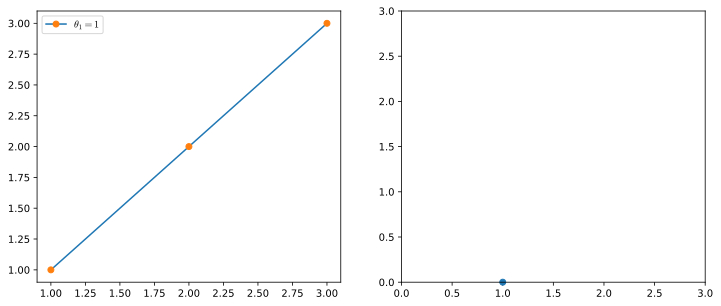

In [16]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
ax1.plot(x, x, marker='o', markerfacecolor='C1', markeredgecolor='C1', label='$\\theta_1=1$');
line, *_ = ax2.plot([1], [0], marker='o')
line.set_clip_on(False)
ax1.legend()
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 3);

$$
\begin{align}
J(\theta_1) &= \frac{1}{2m}(0^2+0^2+0^2) \\
&= 0
\end{align}
$$

When $\theta_1 = 1$, we get a slope of 1 which goes through every single data point in our model. Conversely, when $\theta_1 = 0.5$, we see the vertical distance from our fit to the data points increase. 

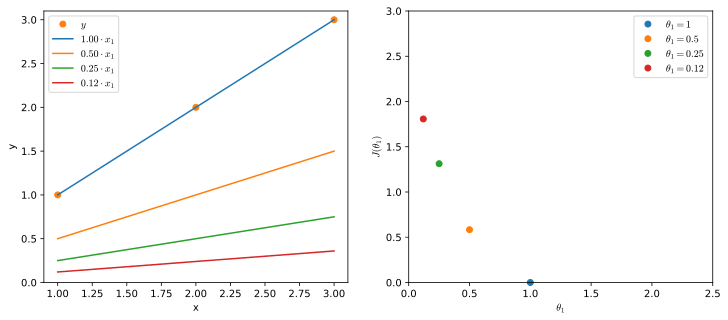

In [17]:
fig, [ax1, ax2] = plt.subplots(1, 2 ,figsize=(12, 5))
x = np.linspace(1,3,3)
line, *_ = ax1.plot(x, x, marker='o', ls='none', c="C1", label='$y$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(0, 3.1)
ax1.set_ylim(0, 3.1)
ax1.legend()
# J = lambda 

for O in [1, 0.5, 0.25, 0.12]:
    # ax1.axline((0, 0), slope=O, label=f'${O:.2f}x_1$')
    ax1.plot(x, x*O, label=f'${O:.2f} \cdot x_1$')
    line, *_ = ax2.plot(O, J(x, x*O), marker='o', ls='none', label=f'$\\theta_1={O}$')
    line.set_clip_on(False)

ax2.legend()
ax1.legend()
ax1.set_xlim(.9, 3.1)
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 3)
ax2.set_xlabel('$\\theta_1$')
ax2.set_ylabel('$J(\\theta_1)$');

Plotting 15 $\theta_1$ values in the interval $[-0.5, 2.5]$ yields a bell shaped graph 

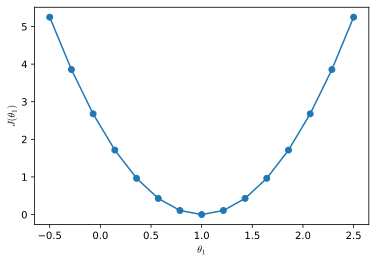

In [18]:
O = np.linspace(-.5, 2.5, 15)
x = np.linspace(1, 3, 3)
X = np.full((len(O), len(x)), x)
Y = (X.T * O).T
j = J(X.T, Y.T)

fig, ax = plt.subplots()
ax.plot(O, j, marker='o')
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$J(\\theta_1)$');

Thus as a goal, we should try to minimize the cost function. In this case, $\theta_1 = 1$ is our global minimum. 

## Cost function visualization for two parameters
Let's take a slightly more complex hypothesis wwhere we have $\theta \in \mathbb{R}^2$. Suppose that we set $\theta_0=50; \;\theta_1=0.06$ amd that we want to plot the corresponding value for the cost function

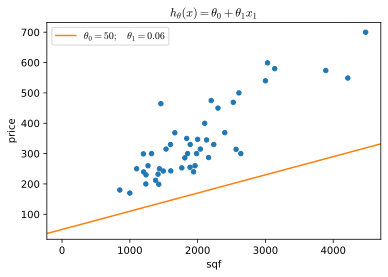

In [19]:
training_set = pd.read_csv('data/house_pricing.csv')
training_set.price /= 1000
ax = training_set.plot.scatter(x='sqf', y='price')
ax.set_title(r'$h_\theta(x)=\theta_0+\theta_1x_1$')
ax.axline((0, 50), slope=0.06, c='C1', label=r'$\theta_0=50; \quad \theta_1=0.06$')
ax.legend();

Now we have two parameters so the cost function depends on two variables and its plot needs to account for three dimensions. We can use a surface plot where the $x$ axis is $\theta_0$, the $y$ axis is $\theta_1$ and the $z$ axis (the height) is the cost function at specific values of $\theta_0, \theta_1$

/tmp/ipykernel_21112/1601170917.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


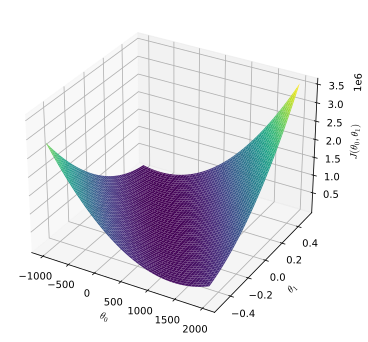

In [20]:
# The plot: LHS is the data, RHS will be the cost function.
fig = plt.figure(figsize=(6, 6))
ax = fig.gca(projection='3d')
x, _, y = training_set.T.values

def cost_func(theta0, theta1, x, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

theta0_grid = np.linspace(-1000,2000,100)
theta1_grid = np.linspace(-.5, .5,100)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis], x, y)

X, Y = np.meshgrid(theta0_grid, theta1_grid)

ax.plot_surface(X, Y, J_grid, lw=0 ,cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$');

These surface plots allow to visualize the cost as a function of two parameters but they are somehow difficult to interpret and the perception of the shape of the cost-function-space is influenced by the perspective from a certain the point of view.

A more accessible kind of plots are the contour plots, bidimensional plot in which the two axis represent the parameters and lines join points where the $J(\theta_0, \theta_1)$ assumes the same value (like geograpical height-maps).

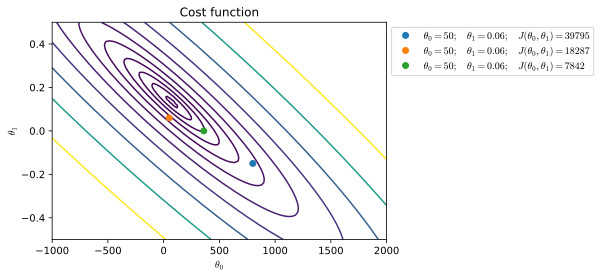

In [21]:
fig, ax = plt.subplots()
contours = ax.contour(X, Y, J_grid, np.logspace(1, 6, 20))

ax.plot(800, -0.15, marker='o', ls='none', 
label=f'$\\theta_0=50; \\quad \\theta_1=0.06; \\quad J(\\theta_0, \\theta_1)={int(J(800+x*-.15, y))}$')

ax.plot(50, 0.06, marker='o', ls='none', 
label=f'$\\theta_0=50; \\quad \\theta_1=0.06; \\quad J(\\theta_0, \\theta_1)={int(J(50+x*.06, y))}$')

ax.plot(360, 0, marker='o', ls='none', 
label=f'$\\theta_0=50; \\quad \\theta_1=0.06; \\quad J(\\theta_0, \\theta_1)={int(J(360+x*0, y))}$')

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost function');